# TABLE OF CONTENT

* [Libraries](#libraries)
* [1. Data Overview](#1-data-overview)
    - [1.1. Category](#1-1-category)
    - [1.2. Products with Zero-prices](#1-2-products-with-zero-prices)
    - [1.3. Prices and Brands](#1-3-prices-and-brands)
    - [1.4. Event Time](#1-4-event-time)
* [2. Market Analysis](#2-market-analysis)
    - [2.1. Customers Buying Habits](#2-1-customers-buying-habits)
        - [Customers Journey](#customers-journey)
        - [Buying Habits](#buying-habits)
        - [Time Distribution Analysis](#time-distribution-analysis)
    - [2.2. Brand Analysis](#2-2-brand-analysis)
* [3. Summary](#3-summary)
    - [Additional comments](#additional-comments)
    - [Recommendations](#recommendations)
* [Acknowledgement](#acknowledgement)


# Libraries

In [22]:
#%pip install -r requirement.txt

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

input_path = 'data\multi-category'
for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\multi-category\2019-Nov.csv
data\multi-category\2019-Oct-feat.csv
data\multi-category\2019-Oct.csv


# Data overview

We are gonna do a exploratory data analysis (EDA) on a set of behavior data for 1 month (October-2019) from a large multi-category online store. This dataset is valuable for further implementation of recommendation system, sale forecasting model, customer segmentation - behavior analysis, and more... Now, let's take a general look on the dataset.

**ATTENTION: Be ready! This will be a very longgg EDA since the data have a lot to do with. Alternatvely, view Section 3 for short *Summary* of this notebook.**

In [2]:
# Load data 
data = pd.read_csv('data\\multi-category\\2019-Oct.csv')

In [8]:
# Show head
data.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
9,2019-10-01 00:00:11 UTC,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb


In [11]:
# Show dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [10]:
# Summarize the training set
data.describe()

,product_id,category_id,price,user_id
count,4.244876e+07,4.244876e+07,4.244876e+07,4.244876e+07
mean,1.054993e+07,2.057404e+18,2.903237e+02,5.335371e+08
std,1.188191e+07,1.843926e+16,3.582692e+02,1.852374e+07
min,1.000978e+06,2.053014e+18,0.000000e+00,3.386938e+07
25%,1.005157e+06,2.053014e+18,6.598000e+01,5.159043e+08
50%,5.000470e+06,2.053014e+18,1.629300e+02,5.296965e+08
75%,1.600030e+07,2.053014e+18,3.585700e+02,5.515788e+08
max,6.050001e+07,2.175420e+18,2.574070e+03,5.662809e+08


In [4]:
data.count()

event_time       42448764
event_type       42448764
product_id       42448764
category_id      42448764
category_code    28933155
brand            36331684
price            42448764
user_id          42448764
user_session     42448762
dtype: int64

In [5]:
# Count null values
data.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

In [9]:
num_users = data['user_id'].nunique()
num_products = data['product_id'].nunique()
num_categories = data['category_id'].nunique()
num_taxonomies = data['category_code'].nunique()
num_brands = data['brand'].nunique()
print('Total number of users: ',num_users)
print('Total number of products: ', num_products)
print('Total number of categories: ', num_categories)
print('Total number of taxonomies: ', num_taxonomies)
print('Total number of brands: ', num_brands)

Total number of users:  3022290
Total number of products:  166794
Total number of categories:  624
Total number of taxonomies:  126
Total number of brands:  3444


We will analyze over a dataset of **42,448,762 rows** with **9 columns** containing basic information of user (user_id, user_session), product (product_id, category_id, category_code, brand, price) and event (event_time, event_type). Additionally, two columns containing information of products. category_code and brand have missing values. Here are short summarize of those attributes:

| **Property**     | **Description**                                             | **Type**  | **Note**
|------------------|-------------------------------------------------------------|-----------|-----------------------------------
| **event_time**   | Time when event happened at (in UTC).                       | *time*    | **42,448,762** total values
| **event_type**   | Four kinds of event: view, cart, purchase, remove from cart | *string*  | **96%** view, **2.2%** purchase, **1.8%** cart
| **product_id**   | ID of a product.                                            | *integer* | **166,794** distinct products
| **category_id**  | Product's category ID.                                      | *integer* | **624** category IDs
| **category_code**| Product's category taxonomy, code name (can be missing).    | *string*  | **126** different taxonomies
| **brand**        | Downcased string of brand name (can be missing).            | *string*  | **3444** different brands
| **price**        | Float price of a product. Present.                          | *float*   | min: **0**, max: **2574**, mean: **290**
| **user_id**      | Permanent user ID.                                          | *integer* | **3,022,290** total users
| **user_session** | Temporary user's session ID. Changed after pauses.          | *string*  | 


What we don't have (that may support the analysis for further recommendation system) are: **user information** (age, gender, country, etc.), **user feedback** (in content-filtering, understanding user sastification toward a product is very important to build a good recommender), online store website structure (the website's navigation and category layout influence how customers browse and find products, since we have category_code support the fact that its product hierarchy that puts products into categories, and tags are used to group products into each category).

We have 4 kinds of numeric data, but the only numeric data that can offer valuable information is the price of products, this can be further used for sale analysis and forecasting and customer behavior analysis or segmentation:
- **price**: average price of 290 USD, there are some products with price of **0 USD**, the maximum price is **2,574 USD**.
- **user_id** and **product_id**: there are total approximately 3 million users on e-commerce platform with about **167,000** different products.
- Here we have **624 categories** within **127 taxonomies** and **3444 brands**:
    - The **category_id** column contains numerical identifiers for different categories of products. Each product is assigned a specific *category_id* to indicate its category. 
    - The **category_code** column contains hierarchical codes that describe the product's category and subcategory. These codes can be more specific and detailed, providing a structured way to categorize products based on their characteristics. 

Let's extract some features from **category_code**

## 1. Category

In this section we will focus on the category of products which offer valuable information on customer behavior (the customer bahavior toward different categories, brands and price will be discussed in details later on). There are 2 types of category representations: **category_id** and **category_code**, both have its benefits:

- **Category ID:** The "category_id" is a numerical identifier assigned to each product category. It's a unique numerical code used to distinguish different categories from each other. It's often used for database indexing and efficient querying because numerical codes are faster to process than text-based codes.
    
- **Category Code (Product Taxonomy):** The **category_code** is a textual representation of a product's category within a taxonomy or hierarchy. It's a more human-friendly way to understand the product's category. It follows a hierarchical structure where the different levels of the category hierarchy are separated by periods (for examples: "appliances.environment.water_heater" or "furniture.living_room.sofa").

In many cases, the **category_code** is derived from the hierarchical structure of the taxonomy, and the **category_id** is used internally for database operations and indexing. Below image is an example for product taxonomy structure in an online shopping website (**Amazon**).


![Amazon product taxonomy online website](images/product-taxonomy-amazon.png)

Since **category_id** is used for the purpose of enhancing computing speed, it has less insight for analysis and less human-readable, thus we will focus mainly on **category_code**. From the data we can see that, **category_code** follows a hierarchical structure, where each level of the hierarchy is separated by periods. Specifically, it has a structure of **<category_1.category_2.category_3....>** with multiple levels. Let us separate those by the first period ('.'), split the category_code into 2 columns including **main_category** and **sub_category** and get a closer look.

<sup>*(Since the numbers of levels are different for different categories, therefore I just extract the categories before the first period as **main_category** while the rest as **sub_category**)*</sup>


In [5]:
# Copy to new dataframe to avoiding from adjusting the original dataframe
data_Oct = data.copy()
print('Copy successfully')

Copy successfully


In [6]:
# Split by the first period (n=1)
data_Oct[['main_category', 'sub_category']] = data_Oct['category_code'].str.split('.', n=1, expand=True)
print('Split successfully')

Split successfully


In [7]:
# Rearrange the columns
#data_Oct = data_Oct.drop(columns=['category_code'])
new_order = ['event_time', 'event_type', 'product_id', 'category_id', 'main_category', 'sub_category', 'brand', 'price', 'user_id', 'user_session']
data_Oct = data_Oct[new_order]
data_Oct.head(10)

,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances,environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture,living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers,notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics,smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers,desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,NaN,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,NaN,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel,shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
9,2019-10-01 00:00:11 UTC,view,1004545,2053013555631882655,electronics,smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb


In [ ]:
# Save to csv
data_Oct.to_csv(f'{input_path}\\2019-Oct-feat.csv')

In [3]:
# Save to csv
data_Oct = pd.read_csv(f'{input_path}\\2019-Oct-feat.csv')

In [101]:
# Donut chart of main_category
mainCat_values = data_Oct.groupby('main_category')['product_id'].nunique().sort_values(ascending=False)
mainCat_names = mainCat_values.index
mainCat_values

main_category
electronics     14950
apparel         13417
appliances      12362
computers        7930
furniture        6972
construction     5701
kids             5123
accessories      2516
sport            2157
auto             1201
stationery        607
country_yard      185
medicine           29
Name: product_id, dtype: int64

In [102]:
# Pie chart for main-categories
print('Number of main-categories: ', len(mainCat_names))
fig = px.pie(names=mainCat_names, values=mainCat_values, hole=0.3)
fig.update_layout({"title":{"text":"Main category distribution", "x":0.50}})
fig.show()

Number of main-categories:  13


In [3]:
# Donut chart of sub_category - top 10
subCat_values = data_Oct.groupby('sub_category')['product_id'].nunique().sort_values(ascending=False)
subCat_names = subCat_values.index
subCat_values

sub_category
clocks                     7788
shoes                      6156
shoes.keds                 2262
toys                       2138
audio.headphone            2134
                           ... 
shoes.espadrilles             7
furniture.hammok              6
accessories.anti_freeze       4
furniture.bench               4
tools.soldering               2
Name: product_id, Length: 126, dtype: int64

In [4]:
# Pie chart for sub-categories
print('Number of sub-categories: ', len(subCat_names))

# # Create a new array of sub-category values with the summed value of sub-categories not in top 10
other_value = subCat_values[10:].sum()
subCat_names_with_other = np.append(subCat_names[:10], 'Other')
subCat_names_with_other  = np.append(subCat_values[:10], other_value)

fig = px.pie(names=subCat_names_with_other , values=subCat_names_with_other , hole=0.3)
fig.update_layout({"title":{"text":"Sub category distribution", "x":0.50}})
fig.show()

Number of sub-categories:  126


From above chart, **electronics** with sub-category is **clocks** has largest portion of all products (**26.6%**). This is followed quite closed by **shoes** in **apparel** with **21.1%**. We can observe that the number of **sub-categories** are 126 which is equal to number of **category_code** before splitting. This observation highlights that when extracting valuable insights from the **main-category** attribute, the **category_code** retains its original property and is reflected in the **sub-category** attribute.

Now, we are gonna see what sub-categories products are in the **electronics** category.

In [100]:
# Sub-categories in *electronics* products
electronicsCat_names = data_Oct[data_Oct['main_category']=='electronics']['sub_category'].unique()
electronicsCat_values = data_Oct[data_Oct['main_category']=='electronics'].groupby('sub_category')['product_id'].nunique()
print('Number of sub-categories in kid products: ', len(electronicsCat_names))
electronicsCat_values

Number of sub-categories in kid products:  13


sub_category
audio.acoustic              693
audio.headphone            2134
audio.microphone            259
audio.music_tools.piano     107
audio.subwoofer             876
camera.photo                246
camera.video                 87
clocks                     7788
smartphone                 1285
tablet                      367
telephone                   435
video.projector             116
video.tv                    557
Name: product_id, dtype: int64

It's obvious that many **sub-categories share the same main-category**, this can be considered as type of **tree** data structure:

- electronics:
  - clocks
  - audio.headphone
  - smartphone
  - audio.subwoofer
  - ...
- apparel:
  - ...

Another important observation is that the reverse is not true: there won't be any instance where **two main categories share the same sub-category**. In other words, *each sub-category is uniquely associated with a specific main category*. This is proved by below implementation:


In [24]:
# Is there any pair of main-categories has the same sub-category?

# Group main categories by sub-category and count the occurrences
main_cat_counts = data_Oct.groupby(['sub_category', 'main_category']).size().reset_index(name='count')

# Find pairs of main categories with the same sub-category
duplicate_pairs = main_cat_counts[main_cat_counts.duplicated(subset='sub_category', keep=False)]

# Display duplicate pairs
duplicate_pairs

Empty DataFrame
Columns: [sub_category, main_category, count]
Index: []


In [80]:
# Create data of main and sub categories with counts of products 
category_counts = data_Oct.drop_duplicates(subset='product_id').groupby(['main_category', 'sub_category']).size().reset_index(name='count')

# Treemap plot
fig = px.treemap(category_counts, path=[px.Constant("all"), 'main_category', 'sub_category'], values='count',
                  color='count', hover_data=['count'],
                  color_continuous_scale='YlGnBu',)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [68]:
# There are many products have no code, the percentage are:
no_categoryCode = data_Oct.drop_duplicates(subset='product_id')['main_category'].isna().sum()
have_categoryCode = category_counts['count'].sum()
print('Percentage of products have category_code: {0:.2f}%'.format(100*have_categoryCode/(have_categoryCode+no_categoryCode)))
print('Percentage of products have NO category_code: {0:.2f}%'.format(100*no_categoryCode/(have_categoryCode+no_categoryCode)))

Percentage of products have category_code: 43.86%
Percentage of products have NO category_code: 56.14%


It is worth noting that, the percentage of products that have **NO category_code** are quite large (**56.14%**). This can make category_code hard to offer helpful information for the customer behavior analysis. Below implementation shows that each **category_id** are consistent with specific **category_code**, i.e. one **category_id** has only one corresponding **category_code** and vice versa. For example, ID *2053013560346280633* is corresponding with *code kids.carriage*, ID *2053013552326770905* with *appliances.environment.water_heater* and so on. A **category_id** that has NaN **category_code** for one product is NaN for others. With all products are assigned their **category_id**, although the IDs are not human-readable, **analyzing customer behavior based on **category_id** is recommended to obtain valuable insights.**

In [119]:
# Group products with category ids
catId_data = data_Oct.drop_duplicates(subset='product_id').groupby(['category_id'])

# Count for inconsistent id and code
non_consistent = 0
for cat_id, group in catId_data:
    unique_codes = group['sub_category'].unique() # since sub-categories reflect catergory codes
    
    if len(unique_codes) > 1:
        print(f"For category_id {cat_id}, multiple category_codes exist: {unique_codes}")
        non_consistent+=1

print(f"Found {non_consistent} inconsistent category_id and category_code")

Found 0 inconsistent category_id and category_code


## 1.2. Products with Zero-price

In [38]:
zero_price = data_Oct[data_Oct['price']==0]
zero_price.head(10)

,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session,price_range
2259,2019-10-01 02:21:36 UTC,view,53000001,2146660886926852416,NaN,NaN,NaN,0.0,512450748,03267357-d0e5-4831-acee-6554cba7c0b1,NaN
2312,2019-10-01 02:21:44 UTC,view,53000001,2146660886926852416,NaN,NaN,NaN,0.0,512450748,03267357-d0e5-4831-acee-6554cba7c0b1,NaN
2600,2019-10-01 02:22:31 UTC,view,7000684,2053013560346280633,kids,carriage,NaN,0.0,555462472,c378efe2-75b4-48fa-96ec-bce2ab05d7fc,NaN
3367,2019-10-01 02:24:38 UTC,view,4100157,2053013561218695907,NaN,NaN,NaN,0.0,531057348,6b9c87ab-f991-45ce-98d2-f5ef05e0b2a4,NaN
4941,2019-10-01 02:28:07 UTC,view,23301316,2053013561956893455,NaN,NaN,NaN,0.0,521311516,f3a2fd03-13eb-4235-96bd-15329b8db1b8,NaN
5007,2019-10-01 02:28:16 UTC,view,13105134,2053013553526341921,NaN,NaN,NaN,0.0,542208580,28f1c782-c8a4-4110-baef-2a390c0994c8,NaN
5843,2019-10-01 02:29:51 UTC,view,31200824,2053013558098133555,NaN,NaN,NaN,0.0,513025724,85eb9f41-fc42-44d5-ace9-f693c7a917bd,NaN
5947,2019-10-01 02:30:01 UTC,view,23301316,2053013561956893455,NaN,NaN,NaN,0.0,521311516,f3a2fd03-13eb-4235-96bd-15329b8db1b8,NaN
5951,2019-10-01 02:30:02 UTC,view,31200824,2053013558098133555,NaN,NaN,NaN,0.0,513025724,85eb9f41-fc42-44d5-ace9-f693c7a917bd,NaN
9514,2019-10-01 02:36:27 UTC,view,32403740,2053013566562238479,NaN,NaN,NaN,0.0,546652849,4ebb4cd0-26ba-443d-af09-fba174389796,NaN


It seems like those 0-price product has **no brand** and some are with **undefined category code**, let's check it out

In [39]:
zeroprice_total = zero_price['product_id'].nunique()
print('Total 0-price products: ', zeroprice_total)
nobrand_zeroprice_percentage = 100*zero_price[zero_price['brand'].isna()]['product_id'].nunique()/zeroprice_total
print('Pecentage of 0-price products has no brand: {0:.2f}%'.format(nobrand_zeroprice_percentage))
zeroprice_percentage = 100*zero_price['product_id'].nunique()/data['product_id'].nunique()
print('Pecentage of 0-price products per all products: {0:.2f}%'.format(zeroprice_percentage))
nobrand_percentage = 100*data[data['brand'].isna()]['product_id'].nunique()/data['product_id'].nunique()
print('Pecentage of products has no brand per all products: {0:.2f}%'.format(nobrand_percentage))

Total 0-price products:  11095
Pecentage of 0-price products has no brand: 100.00%
Pecentage of 0-price products per all products: 6.65%
Pecentage of products has no brand per all products: 30.71%


From this we can draw one observation that: all the **zero price** products having **no brand** which account for **6.65%** of total products. However, **NOT ALL no brand** product are 0 USD, the number of product with no brand account for **30.71%** of total products. Additionally, 0-price products are potentially due to:

1. **Missing information**: The unknown brand and 0 USD price might indicate that these products are placeholders or items for which complete information hasn't been entered into the dataset.

2. **Free or Promotional Items**: A 0 USD price might be intentional to indicate that the product is not being sold but rather offered as a promotion.

3. **Special Cases**: Some products might genuinely have a 0 USD price due to unique circumstances. For example, a software product with a freemium model might have a free version with a 0 USD price. Or products that have not show and the prices can be considered as **placeholder prices**.

Further analysis will be investigated more to figure out the potential state of these products by looking at their correlations, so that we can have a suitable solution to handle on those values.

In [63]:
# Main category of those product?
zeroprice_mainCat = zero_price.groupby('main_category')['product_id'].nunique()
zeroprice_mainCat

main_category
accessories      250
apparel         1237
appliances       570
auto             105
computers        401
construction     161
country_yard       5
electronics      729
furniture        525
kids             211
medicine           6
sport             97
stationery        30
Name: product_id, dtype: int64

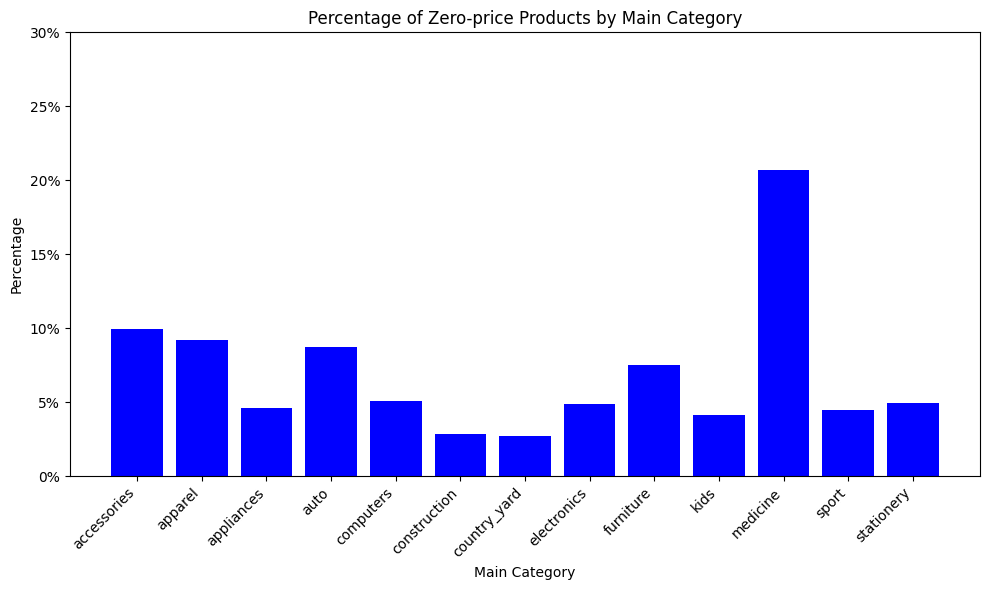

In [83]:
# Calculate the percentage of zero-price products by main category
percentage_zero_price = zeroprice_mainCat/mainCat_values * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(percentage_zero_price.index, percentage_zero_price, color='blue')
plt.title('Percentage of Zero-price Products by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 30)  # Set y-axis limit to 0-100 for percentage

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

# Show the plot
plt.tight_layout()
plt.show()


From this we can see that, zero-price products exists in all kinds of products, but **medicine** products exhibits the highest percentage of zero-price products, accounting for approximately **20%**, whereas the remaining categories all have a proportion of zero-price products **below 10%**. It's also worthy to analyze the events passed to those zero-price products:

In [41]:
# Donut chart of event_type
zeroprice_event_names = zero_price['event_type'].unique()
zeroprice_event_values = zero_price['event_type'].value_counts()
fig = px.pie(names=zeroprice_event_names, values=zeroprice_event_values, hole=0.3)
fig.update_layout({"title":{"text":"Distibution of zero-price product events", "x":0.50}})
fig.show()

Now, the situation regarding zero-price products becomes clearer. It seems that users were **inclined not to make a purchase** for these products or the users **cannot purchase** product with no price. Alternatively, the products with zero prices **might be upcoming items** that hadn't been sold yet. To further illuminate this, let's select some products with (initial) zero price and explore its price history.

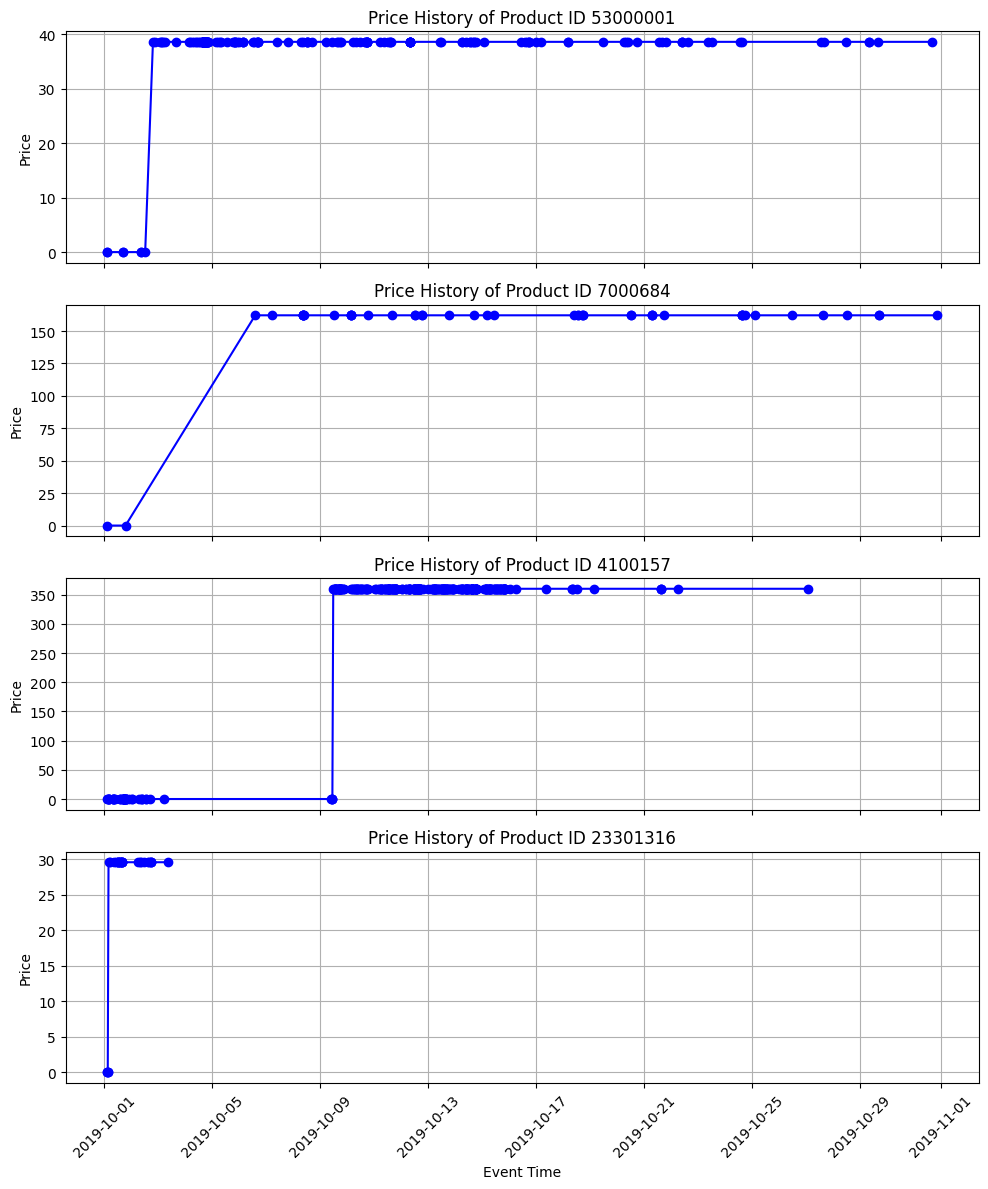

In [47]:
zeroprice_id = [53000001, 7000684, 4100157, 23301316]

# Convert event_time to datetime format
data_Oct['event_time'] = pd.to_datetime(data_Oct['event_time'])

# Create subplots
fig, axs = plt.subplots(len(zeroprice_id), 1, figsize=(10, 12), sharex=True)

# Plot price history for each product
for i, product_id in enumerate(zeroprice_id):
    product_data = data_Oct[data_Oct['product_id'] == product_id]
    axs[i].plot(product_data['event_time'], product_data['price'], marker='o', linestyle='-', color='b')
    axs[i].set_title(f'Price History of Product ID {product_id}')
    axs[i].set_ylabel('Price')
    axs[i].grid(True)

axs[len(zeroprice_id) - 1].set_xlabel('Event Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 It appears that some products **initially had a zero price but later transitioned to having a non-zero price**. Specifically, when examining the price history of a product with the **ID 53000001**, we observe instances where the price was initially recorded as 0, but later it changed to 38.59 with the brand "nike." Some products are
 This observation suggests that the zero-price instances might represent either products that were initially introduced without a price or products for which the price was not immediately available at the time of data collection.

 But there might be not all products have **placeholder price**, it is possible due to other reasons as **availability issues** (some products might be temporarily out of stock or unavailable for purchase), **promotions** (these zero-price products are part of an inventory clearance sale or special promotional event), **price update** or even worst: **data entry error**. So to make sure, we should track whether the price of all zero-price products having are changing throughout the recorded period. This can be implemented by simply calculating their mean price throughout the recorded month (mean price of 0 means zero all the time):

In [63]:
zeroprice_products = data_Oct.groupby('product_id')
mean_price = zeroprice_products['price'].mean()
zeromean_price = mean_price[mean_price==0]
zeromean_price

product_id
1004914     0.0
1201518     0.0
1306190     0.0
1306252     0.0
1307551     0.0
           ... 
59500026    0.0
59500031    0.0
59500032    0.0
59600002    0.0
60500008    0.0
Name: price, Length: 1147, dtype: float64

There are still many products did not experience any change in price over the recorded month. It's still possible that these products are relatively new and have not been sold yet in that month. Though the percentage of products that are *truly* zero-price is quite small (**1147/166,794 all products ~ 0.69%**), to better understand this phenomenon, it's advisable to incorporate *additional data from different months*.

## 1.3. Price and Brand

Text(0.5, 1.0, 'Distribution of price')

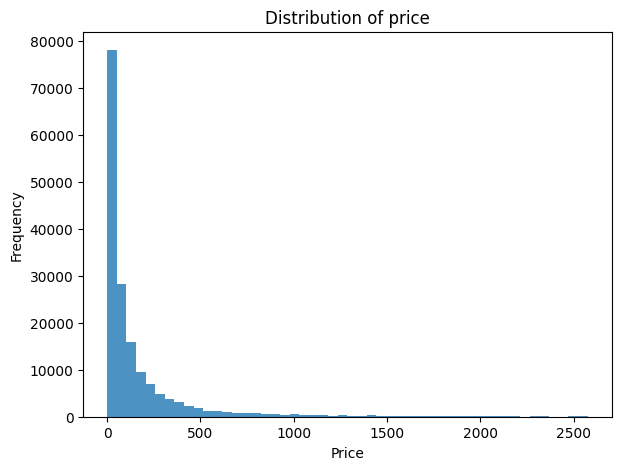

In [31]:
# Histogram with price
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 2, 1) 
plt.hist(data_Oct.drop_duplicates(subset='product_id')['price'], bins=50, alpha=0.8)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of price')

It's clear that the prices are **left-skewed**, almost the prices on the shopping website fall **below 500 USD**. Based on the distribution, prices that are **closed** to zero have highest frequency. Let's draw a pie chart by segmenting the price into 4 ranges: *0-10USD, 10-100 USD, 100-500 USD, and above 500 USD.*

In [9]:
# Derive dataset for distinct products
data_product = data_Oct.drop_duplicates(subset='product_id')
data_product

,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances,environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture,living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers,notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics,smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...
42442833,2019-10-31 23:10:44 UTC,view,49300142,2125931803410694331,NaN,NaN,weekend,664.11,549922696,2750fa2f-28c8-4e4f-a303-5447c700f4c8
42444300,2019-10-31 23:22:35 UTC,view,49300114,2125931803410694331,NaN,NaN,weekend,1325.65,563587006,90bb9fb9-5346-455a-95d4-c4e554adb100
42447255,2019-10-31 23:47:55 UTC,view,46800037,2110187395394568257,appliances,kitchen.refrigerators,ezetil,180.16,515624552,0e732a00-c02d-4b3c-8927-c9a38a167cf2
42447350,2019-10-31 23:48:43 UTC,view,19002087,2053013557225718275,NaN,NaN,orivel,155.68,515474976,222c370b-0fac-4287-982b-e340f5eaf3a1


In [10]:
# Categorize products based on price ranges
bins = [0, 10, 100, 500, float('inf')]
labels = ['0-10 USD', '10-100 USD', '100-500 USD', 'Above 500 USD']
price_range_data = pd.cut(data_product['price'], bins=bins, labels=labels).reset_index()
price_range_data.head(5)

,index,price
0,0,10-100 USD
1,1,10-100 USD
2,2,Above 500 USD
3,3,100-500 USD
4,4,Above 500 USD


In [11]:
# Count the number of products in each price range
price_range_counts = price_range_data['price'].value_counts().reset_index()
price_range_counts.columns = ['price', 'count']

# Create a donut chart using Plotly Express
fig = px.pie(price_range_counts, values='count', names='price', hole=0.3,
             labels={'price': 'Price Range'},
             title='Distribution of Products by Price Range')

# Show the donut chart
fig.show()

Most frequent prices fall in the range from **10 to 100 USD** (almost 50% of all products). In constrast, product with price that **above 500 USD accounts for less than 10%** of the products. How about the brand? The price range of each brand are be segmented by using **median price** values:

In [7]:
# Median price of each brand
median_price = data_Oct.groupby('brand')['price'].median().reset_index()
median_price

,brand,price
0,a-case,4.35
1,a-derma,12.36
2,a-elita,8.49
3,a-mega,72.07
4,aardwolf,84.43
...,...,...
3439,zte,77.20
3440,zubr,45.56
3441,zuru,12.84
3442,zvezda,45.17


In [8]:
median_range_data = pd.cut(median_price['price'], bins=bins, labels=labels)

# Count the number of products in each price range
median_range_counts = median_range_data.value_counts()

# Create a donut chart using Plotly Express
fig = px.bar(data_frame=median_range_counts, x=median_range_counts,y=median_range_counts.index,
            orientation='h', labels={'x': 'Number of brands', 'y': 'Median Price Range'},
             title='Number of Brands by Median Price Range')

# Show the donut chart
fig.show()

The presence of a significant number of brands in the **100-500 USD** range suggests a consumer demand for mid-range products with advanced features (will have closer look on customer perspectives).

## 1.4. Event time

In this section, we are going to split **event_time** into **date** and **time**, also extract **weekday** from **date** feature for further customer behavior analysis:

In [4]:
# Split into date and time
data_Oct['event_time'] = pd.to_datetime(data_Oct['event_time'])
data_Oct['date'] = pd.to_datetime(data_Oct['event_time'].dt.date)
data_Oct['time'] = data_Oct['event_time'].dt.time
data_Oct['weekday'] = data_Oct['date'].dt.weekday

In [5]:
data_Oct.drop('event_time', axis='columns')
data_Oct = data_Oct[['date', 'weekday', 'time', 'event_type', 'product_id', 'category_id', 'main_category', 'sub_category', 'brand', 'price', 'user_id', 'user_session']]
data_Oct.head(5)

,date,weekday,time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-10-01,1,00:00:00,view,44600062,2103807459595387724,NaN,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01,1,00:00:00,view,3900821,2053013552326770905,appliances,environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01,1,00:00:01,view,17200506,2053013559792632471,furniture,living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01,1,00:00:01,view,1307067,2053013558920217191,computers,notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01,1,00:00:04,view,1004237,2053013555631882655,electronics,smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [6]:
data_Oct['date'] = data_Oct['date'].astype(str)
data_Oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   weekday        int32  
 2   time           object 
 3   event_type     object 
 4   product_id     int64  
 5   category_id    int64  
 6   main_category  object 
 7   sub_category   object 
 8   brand          object 
 9   price          float64
 10  user_id        int64  
 11  user_session   object 
dtypes: float64(1), int32(1), int64(3), object(7)
memory usage: 3.6+ GB


In [9]:
data_Oct.to_csv(f'{input_path}\\2019-Oct-clean.csv')

In [ ]:
# For loading data
data_Oct = pd.read_csv(f'{input_path}\\2019-Oct.csv')

# 2. Market analysis

## 2.1. Customers buying habits

### Customer's journey

Each customer has their own ID assigned for the correspoding customer account/IP. The dataset reflects customer behavior based on the events that he/she interacted on e-commerce platform. This example shows a common flow of a random user: what she/he looked and what bought.

In [7]:
data_Oct.loc[data_Oct.user_session == "3c80f0d6-e9ec-4181-8c5c-837a30be2d68"].sort_values(by=['date', 'time'])

,date,weekday,time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
127,2019-10-01,1,00:01:45,view,1003305,2053013555631882655,electronics,smartphone,apple,612.43,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
152,2019-10-01,1,00:02:08,view,1002528,2053013555631882655,electronics,smartphone,apple,643.23,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
200,2019-10-01,1,00:02:47,view,1002532,2053013555631882655,electronics,smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
308,2019-10-01,1,00:04:37,purchase,1002532,2053013555631882655,electronics,smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
328,2019-10-01,1,00:05:10,view,1002532,2053013555631882655,electronics,smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
362,2019-10-01,1,00:05:46,view,41300118,2091727629378912491,NaN,NaN,arena,48.65,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
383,2019-10-01,1,00:06:07,view,41300138,2091727629378912491,NaN,NaN,arena,411.59,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
530,2019-10-01,1,00:08:53,view,4804056,2053013554658804075,electronics,audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
569,2019-10-01,1,00:09:24,view,4804056,2053013554658804075,electronics,audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
603,2019-10-01,1,00:09:54,purchase,4804056,2053013554658804075,electronics,audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68


You can read it like:

1. The user checked out several *iPhones* on **2019-10-01, Tuesday** from **00:01:45** to **00:02:47**.

2. Purchased one *iPhone* in 1 click (without cart event) at **00:04:37**, price **above 500 USD**.

3. Viewed 2 *unknown products* of brand **arena**.

4. Visited some *Apple's headphones* and purchased one at **00:09:54** the **same day**, price in range **100-500 USD**.

5. After that visited more expensive one but decided to not buy it.

### Buying habits

Derive data that people decided to purchase:

In [8]:
data_purchase = data_Oct[data_Oct['event_type']=='purchase']
data_nonpurchase = data_Oct[data_Oct['event_type']!='purchase']
data_purchase.describe()

,weekday,product_id,category_id,price,user_id
count,742849.000000,7.428490e+05,7.428490e+05,742849.000000,7.428490e+05
mean,2.945792,6.492307e+06,2.054951e+18,309.561569,5.356101e+08
std,1.951637,8.855381e+06,1.315875e+16,348.873241,1.826311e+07
min,0.000000,1.000978e+06,2.053014e+18,0.770000,2.646498e+08
25%,1.000000,1.004839e+06,2.053014e+18,87.490000,5.167003e+08
50%,3.000000,1.801739e+06,2.053014e+18,179.840000,5.351349e+08
75%,5.000000,8.700430e+06,2.053014e+18,375.210000,5.536670e+08
max,6.000000,6.050001e+07,2.175420e+18,2574.070000,5.662783e+08


There are total **742,849 orders** made in October, 2019.

As you can see, we have 4 kinds of customer-product interactions including:

- **view**: a user viewed a product

- **cart**: a user added a product to shopping cart

- **remove_from_cart**: a user removed a product from shopping cart

- **purchase**: a user purchased a product

Below chart illustrate the distribution of events throughout whole dataset, it is observed that there are only 3 kinds of interations (excluding *remove_from_cart*) in this specific month.

In [ ]:
# Donut chart of event_type
event_types = data_Oct['event_type'].unique()
event_types_count = data_Oct['event_type'].value_counts()
fig = px.pie(names=event_types, values=event_types_count, hole=0.3)
fig.update_layout({"title":{"text":"Distibution of classes", "x":0.50}})
fig.show()

Now we will analyze customer behavior by **event_time**:

1) What day in week has largest amount of interactions?

2) What time in day has largest amount of interactions?

3) What is the total order from: all categories/ some specific categories per day/week?

### Time distribution analysis

In [9]:
# Add hour column
data_Oct['hour'] = data_Oct['time'].apply(lambda t: t.hour)

In [17]:
# Get event counts per hour data
event_types = ['view', 'cart', 'purchase']

event_by_hour = {}
for event_type in event_types:
    event_count = data_Oct[data_Oct.event_type == event_type].groupby("hour")["event_type"].count()
    event_by_hour[event_type] = event_count

event_by_hour = pd.DataFrame(event_by_hour)

In [18]:
# Plot bar chart
fig = px.bar(event_by_hour, x=event_by_hour.index, y=event_types,
             title="Distribution of Events by Hour",
             labels={"x": "Hour in a Day", "y": "Number of Events"},
             template="plotly_white")

# Show the plot
fig.show()

In [24]:
# Event type percent by hour
for event_type in event_types:
    event_by_hour[f'{event_type}_percent'] = event_by_hour[event_type]/event_by_hour[event_type].sum()


# Line plot
fig = px.line(event_by_hour, x=event_by_hour.index, y=[f'{event_type}_percent' for event_type in event_types],
              title="Percentage Distribution of Events by Hour",
              labels={"x": "Hour in a Day", "y": "Percentage"},
              template="plotly_white")
fig.show()

In [25]:
# Get event by weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

event_by_weekday = {}
for event_type in event_types:
    event_count = data_Oct[data_Oct.event_type == event_type].groupby("weekday")["event_type"].count()
    event_by_weekday[event_type] = event_count

event_by_weekday = pd.DataFrame(event_by_weekday)

# Event type percent by weekday
for event_type in event_types:
    event_by_weekday[f'{event_type}_percent'] = event_by_hour[event_type]/event_by_hour[event_type].sum()

# Plot bar chart
fig = px.line(event_by_weekday, x=weekdays, y=[f'{event_type}_percent' for event_type in event_types],
              title="Percentage Distribution of Events by Weekday",
              labels={"x": "Weekday", "y": "Percentage"},
              template="plotly_white")
fig.show()

The view by hour in a day has peak at around late afternoon (**4 p.m**) with nearly plateau in the morning (**6 a.m to 12 p.m**). With a reversed trend, purchase and cart event reached their peak at late morning (**8-9 a.m**) and gradually decreased afterwards. 
It's obvious that weekday has strong effect on customer buying behavior: the rate of users buy and search for products in the weekends are approximately seventh-times higher than the early weekdays **Monday, Tuesday**.  

## 2.2. Brand analysis

In [ ]:
# Categorize products based on price ranges
price_range_data = pd.cut(data_purchase['price'], bins=bins, labels=labels).reset_index()
# Count the number of products in each price range
price_range_counts = price_range_data['price'].value_counts().reset_index()
price_range_counts.columns = ['price', 'count']

# Create a donut chart using Plotly Express
fig = px.pie(price_range_counts, values='count', names='price', hole=0.3,
             labels={'price': 'Price Range'},
             title='Distribution of Products by Price Range (purchased)')

# Show the donut chart
fig.show()


In contrast to the previous distribution of prices across the entire dataset, it's evident that approximately 50% of the products fall within the low-price range (below 100 USD). However, customers exhibit a stronger preference for products in the **mid-price range (100-500 USD)**. On the other hand, products with significantly lower prices **(below 10 USD) seem to garner less attention and interest from customers**.

The *view* event uptakes to **96%** of whole dataset, while only **2%** of customers decided to *purchase* products after view it. The top 20 brands that are most popular are shown bellow

In [ ]:
# Top sellers
purchase_with_brands = data_purchase.loc[data_purchase.brand.notnull()]
top_sellers = purchase_with_brands.groupby('brand').brand.agg([len]).sort_values(by='len', ascending=False).reset_index()
print(top_sellers.head(20))

       brand     len
0    samsung  172896
1      apple  142873
2     xiaomi   56616
3     huawei   23501
4    lucente   11578
5       oppo   10891
6   cordiant   10551
7         lg    8727
8       acer    6882
9       sony    6729
10  elenberg    6190
11     artel    6124
12  triangle    5835
13     bosch    5705
14   indesit    5024
15    nokian    4907
16    lenovo    4578
17   philips    4463
18     vitek    4107
19   redmond    4003


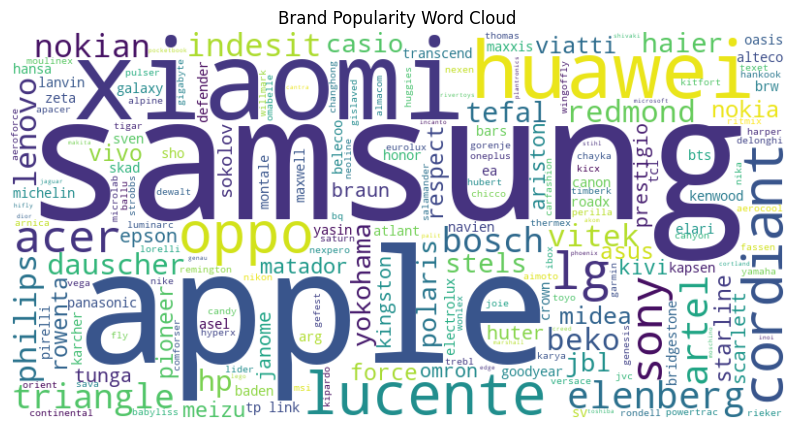

In [ ]:
# Create a string of brand names based on their popularity
brand_text = ' '.join([brand for brand in purchase_with_brands['brand']])

# Generate the word cloud
brand_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(brand_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(brand_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Brand Popularity Word Cloud')
plt.show()

In [ ]:
# Group by category IDs
top_categories_id = data_purchase.groupby('category_id').category_id.value_counts().sort_values(ascending=False).reset_index()
top_categories_id.columns = ['category_id', 'count']

# Create an empty list to store the results
category_info = []

# Loop through each row in top_categories
for index, row in top_categories_id.iterrows():
    category_id = row['category_id']
    
    # Find the corresponding row in data_purchase
    matching_row = data_purchase[data_purchase['category_id'] == category_id].iloc[0]
    
    main_cat = matching_row['main_category']
    sub_cat = matching_row['sub_category']
    
    count_data = row['count']

    category_info.append((category_id, main_cat, sub_cat, count_data))

# Convert the list of tuples to a DataFrame
top_categories = pd.DataFrame(category_info, columns=['category_id', 'main_category', 'sub_category', 'count'])

top_categories.head(20)

,category_id,main_category,sub_category,count
0,2053013555631882655,electronics,smartphone,338018
1,2053013553559896355,NaN,NaN,44019
2,2053013554658804075,electronics,audio.headphone,30503
3,2053013554415534427,electronics,video.tv,21529
4,2053013563810775923,appliances,kitchen.washer,16148
5,2053013558920217191,computers,notebook,15499
6,2053013553341792533,electronics,clocks,13198
7,2053013565983425517,appliances,environment.vacuum,12117
8,2053013563651392361,NaN,NaN,10545
9,2053013553375346967,NaN,NaN,8610


In [ ]:
# Get names and values
names = top_categories.sub_category
values = top_categories['count']

# Group "other" category
other_value = top_categories['count'][10:].sum()
names = names[:10]._append(pd.Series(['Others']))
values = values[:10]._append(pd.Series(other_value))


# Plot donut chart
fig = px.pie(data_frame=top_categories, names=names, values=values, hole=0.3)
fig.update_layout({"title":{"text":"Distibution of sub-categories", "x":0.50}})
fig.show()

In [ ]:
# Total order per time by categories and brands
total_order = data_Oct[data_Oct.event_type == "purchase"].groupby(['category_id', 'main_category', 'sub_category', 'brand'])\
    .event_type.count().sort_values(ascending=False).reset_index()

smartphone_and_brands = total_order[total_order['sub_category']=='smartphone']

# Group out-top-10 as others 
other_value = smartphone_and_brands['event_type'][10:].sum()
names = smartphone_and_brands.brand[:10]._append(pd.Series(['Others']))
values = smartphone_and_brands.event_type[:10]._append(pd.Series(other_value))

fig = px.pie(smartphone_and_brands, names=names, values=values, hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout({"title":{"text":"Distibution of Smartphone Market Share by Brands", "x":0.50}})
fig.show()

Overally, brands like **Samsung**, **Apple**, and **Xiaomi** seem to dominate user interactions; **electronics, appliances, computers (and some unknown category code)** products gain large demands. The demands for **smartphone** is extremely high with over **45% purchase** with highest market share on this product belonging to **Samsung and Apple**.

In [11]:
# Total order per time by brands
order_per_weekday = data_Oct[data_Oct.event_type == "purchase"].groupby(["weekday", "brand"])["event_type"].count().reset_index()
order_per_weekday.head(10)

,weekday,brand,event_type
0,0,a-case,4
1,0,a-mega,1
2,0,acer,873
3,0,achilles,1
4,0,acme,17
5,0,activision,5
6,0,acuvue,3
7,0,adamex,8
8,0,adata,10
9,0,adidas,18


In [37]:
# Calculate total orders per brand
brand_total_orders = order_per_weekday.groupby("brand")["event_type"].sum().reset_index()
top_brands = brand_total_orders.nlargest(10, "event_type")["brand"]

# Filter order_per_weekday for top brands
order_per_weekday_top_brands = order_per_weekday[order_per_weekday["brand"].isin(top_brands)]
weekday_names = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
order_per_weekday_top_brands["weekday"] = order_per_weekday_top_brands["weekday"].map(weekday_names)


fig = px.bar(order_per_weekday_top_brands, x="weekday", y="event_type", color="brand",
             title="Total Orders per Brand per Weekday (Top 10 Brands)",
             labels={"weekday": "Weekday", "event_type": "Total Orders"},
             template="plotly_white")

# Show the plot
fig.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_15348\2460330987.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Minimum of total orders are more than **55k orders** per day, in which total order increases in the middle of the week (**Wednesday, over 70K**) while smaller in other days. Below part illustrates **Revenue by Brands** per date and **Total Revenue** in recorded month.

In [44]:
# Total revenue
revenue_by_brands = data_Oct.groupby('brand')['price'].sum().sort_values(ascending=False).reset_index(name='monthly_revenue')

fig = px.bar(revenue_by_brands[:10], x='brand', y='monthly_revenue',
             title="Total Revenue in October 2019 (Top 10 Brands)",
             labels={"brand": "Brands", "monthly_revenue": "Total Revenue"}, text='monthly_revenue')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside') 
fig.show()

In [36]:
# Daily sale revenue
revenue_by_day = data_Oct.groupby(['date', 'brand'])['price'].sum().reset_index(name='daily_revenue')

# Get the top 5 brands by revenue
top5_revenue_brands = revenue_by_day.groupby('brand')['daily_revenue'].sum().nlargest(5).index
revenue_by_day['brand_grouped'] = revenue_by_day['brand'].apply(lambda x: x if x in top5_revenue_brands else 'Other')

# Take top 5
revenue_day_top5 = revenue_by_day[revenue_by_day['brand_grouped']!='Other']

# Line chart
fig = px.line(revenue_day_top5, x='date', y='daily_revenue', color='brand_grouped', 
              labels={'date': 'Date', 'daily_revenue': 'Daily Revenue'},
              title='Daily Revenue by Brand (Top 5 Brands)',
              category_orders={'brand_grouped': list(top5_revenue_brands)})


fig.update_layout(legend_title_text='Brand',
                  legend=dict(orientation='h', x=0, y=1.02, xanchor='left', yanchor='bottom'))

fig.show()

In [41]:
data_Oct.head(5)

,date,weekday,time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session,hour
0,2019-10-01,1,00:00:00,view,44600062,2103807459595387724,NaN,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,0
1,2019-10-01,1,00:00:00,view,3900821,2053013552326770905,appliances,environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,0
2,2019-10-01,1,00:00:01,view,17200506,2053013559792632471,furniture,living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,0
3,2019-10-01,1,00:00:01,view,1307067,2053013558920217191,computers,notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,0
4,2019-10-01,1,00:00:04,view,1004237,2053013555631882655,electronics,smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,0


Although Samsung has highest number of purchases, **Apple has approximately double daily revenue compared to Samsung**. Highest daily revenue of Apple was on **October 14** and total revenue in the recorded month was over **3.5 billion USD**.

# 3. Summary

Overall, the data set (*2019-Oct*) has 42,448,762 lines of data represented for the event (interactions) between customers and products on an e-commerce platform with multiple categories. Those events include: **view, cart, remove from cart and purchase**. The original data has 7 columns, with columns *brand* and *category_code* have missing data (account for 31% and 56% of whole dataset, respectively).
Feature engineering was applied to extract useful information from the original data, in details:

- *category_code* was splitted into 2 columns containing *mainc_category* with 13 distinct categories and *sub_category* with 126 distinct values.

- *event_time* was splitted into *data* and *time* seperately, alternatively *weekday* was derived from *date*.

In [3]:
# Data before feature engineering
data.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [61]:
# Data after feature engineering
data_Oct.head(5)

,date,weekday,time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session,hour
0,2019-10-01,1,00:00:00,view,44600062,2103807459595387724,NaN,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,0
1,2019-10-01,1,00:00:00,view,3900821,2053013552326770905,appliances,environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,0
2,2019-10-01,1,00:00:01,view,17200506,2053013559792632471,furniture,living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,0
3,2019-10-01,1,00:00:01,view,1307067,2053013558920217191,computers,notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,0
4,2019-10-01,1,00:00:04,view,1004237,2053013555631882655,electronics,smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,0


This e-commerce platform mostly sell **electronics and appliances products** (e.g. smartphone, computers, headphone, etc.) with top 5 most popular brands including: Samsung Apple, Xiaomi, Huawei, Lucente and Oppo. **Samsung and Apple** shared over **40% of the market** with top selling product was **smartphone** (around 45% of purchases). There are some products has zero price with no brand, however, assigned the price and brand later on. One of the reasons for this can be *placeholder price* products or *upcoming* products that were initially introduced without a price or products for which the price was not immediately available at the time of data collection. 

In terms of customer behavior, out of all events, only 2% of which was purchase. Customers usually visit mostly at the weekends, most of the users only dicided to purchase in the morning and only do product research (view) in the afternoon. 

### Additional comments

For the purpose of building real-time models such as recommendation system or sale forecasting based on the data. Here are some advantages and challenges come up with this dataset:

- **Pros:**

    + *Rich Data*: The dataset includes information about event times, event types, product details, user IDs, and user sessions. This information can be valuable for building a recommendation system.

    + *Product Information*: The dataset provides product-related information such as product IDs, category codes, and brands. This can help in understanding the characteristics of products and their relationships.
    
    + *Time Series Aspect*: The dataset includes event times, which can be used for time-based analysis and forecasting.
    
    + *Product Information*: The dataset contains product-related information such as product IDs, category codes, and brands, which can help identify product trends and relationships.
    
    + *Potential Features*: The dataset could be enriched with additional external features like promotions, holidays, and economic indicators to enhance the forecasting model.
    

- **Challenges:**

    + *Sparse Data*: The dataset seems to be focused on user interactions (e.g., views, purchases) rather than explicit user ratings or preferences. Sparse data can make it more challenging to build accurate recommendation systems.

    + *Missing Data*: There are missing values in columns like 'category_code' and 'brand'. Missing data can affect the accuracy of recommendations, especially if they are important features.

    + *Limited User Behavior*: The dataset might lack detailed user behavior information. For instance, knowing how long a user spent on a page, or their interactions within a session, can provide better insights.

    + *Non-Numeric Features*: Some features like 'event_type' and 'category_code' are categorical and require appropriate preprocessing to be used effectively in a forecasting model.


### Recommendations

Some alternative ideas for EDA: 

- Add-to-cart Rate (ATCR), Cart-to-checkout Rate (CTCR) and Cart Abandonment Rate (CAR).

- Time gap between decisions.

- Customer segmentation.

- Is there any change in product price? If yes, how does it effect the customer behavior?

- Returning Customer Rate (RCR) (how many existing customers made two or more purchases within a given time frame).